In [1]:
# Install gdown if not already installed
!pip install -U -q gdown

In [2]:
# Replace 'your_folder_id' with the actual folder ID
folder_id = '1FsQtOI_QES15zZLmEw099MGAR5-rnsOP'

# Download all files from the specified Google Drive folder
# The `--folder` flag indicates that the ID belongs to a folder
# The `--id` flag is for the folder ID
# The `--output` flag (optional) can specify a directory to save files,
# but by default, it will download to the current directory.
print(f"Downloading files from folder ID: {folder_id}")
!gdown --folder --id {folder_id}

print("Download complete. You can list the files in the current directory to see the downloaded content.")

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q clusteringmidterm.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1XtaKeD7b-la2R1ygFBNLj16VD1k0MB2Q
To: /content/Machine Learning/clusteringmidterm.csv
100% 1.01M/1.01M [00:00<00:00, 126MB/s]
Download completed
Download complete. You can list the files in the current directory to see the downloaded content.


In [5]:
import pandas as pd

df = pd.read_csv('/content/Machine Learning/clusteringmidterm.csv')
display(df.head())

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Drop Rows with Missing Values

### Subtask:
Drop rows with any missing values from the DataFrame.


**Reasoning**:
To drop rows with any missing values, I will use the `dropna()` method on the DataFrame. By default, `dropna()` removes rows where *any* column has a `NaN` value. After dropping, I will print the new shape of the DataFrame and recheck for missing values to confirm the operation was successful.

In [ ]:
initial_rows = df.shape[0]
df.dropna(inplace=True)

print(f"Original number of rows: {initial_rows}")
print(f"Number of rows after dropping missing values: {df.shape[0]}")

print("\nRechecking for missing values after dropping:")
missing_values_after_drop = df.isnull().sum()
missing_values_after_drop = missing_values_after_drop[missing_values_after_drop > 0]

if missing_values_after_drop.empty:
    print("No missing values found in the DataFrame after dropping rows.")
else:
    display(missing_values_after_drop)

# Task
Perform a comprehensive Exploratory Data Analysis (EDA) on the `df` DataFrame. This analysis should include understanding the data by displaying the first few rows, column names, and data types; identifying and quantifying missing values; identifying and counting duplicate rows; generating descriptive statistics for numerical columns; visualizing feature distributions using histograms or box plots; and visualizing the correlation matrix of numerical features. Finally, summarize the key findings from this EDA.

## Understand the Data

### Subtask:
Display the first few rows of the DataFrame, along with column names and their data types, to get an initial understanding of the dataset.


**Reasoning**:
To understand the data, I will display the first 5 rows of the DataFrame and then print the column names and their data types using `df.head()` and `df.info()` respectively.



In [6]:
print("First 5 rows of the DataFrame:")
display(df.head())

print("\nColumn names and their data types:")
df.info()

First 5 rows of the DataFrame:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



Column names and their data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                 

## Identify and Handle Missing Values

### Subtask:
Identify and display the count and percentage of missing values for each column in the DataFrame.


**Reasoning**:
To identify and display missing values, I will first calculate the sum of null values for each column and then their respective percentages. These will then be combined into a DataFrame and sorted in descending order to highlight columns with the most missing data.



In [7]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})

missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print("Missing Values in Each Column:")
display(missing_info)

Missing Values in Each Column:


,Missing Count,Missing Percentage (%)
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173


## Identify and Handle Duplicates

### Subtask:
Identify and display the number of duplicate rows in the DataFrame.


**Reasoning**:
To identify and display the number of duplicate rows, I will use the `.duplicated().sum()` method on the DataFrame. This method will return a boolean Series indicating whether each row is a duplicate, and then `sum()` will count the total number of `True` values (duplicate rows).

**Reasoning**:
To identify and display the number of duplicate rows, I will use the `.duplicated().sum()` method on the DataFrame and then print the result.



In [8]:
duplicate_rows = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_rows}")

Total number of duplicate rows: 0


## Generate Descriptive Statistics

### Subtask:
Calculate and display descriptive statistics for numerical columns to understand their distribution, central tendency, and spread.


**Reasoning**:
To calculate and display descriptive statistics for numerical columns, I will use the `.describe()` method on the DataFrame `df`.



In [9]:
print("Descriptive statistics for numerical columns:")
display(df.describe())

Descriptive statistics for numerical columns:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Visualize Feature Distributions

### Subtask:
Generate histograms or box plots for key numerical features to visualize their distributions, and include appropriate legends.


**Reasoning**:
To visualize the feature distributions, I will first import the necessary libraries, `matplotlib.pyplot` and `seaborn`, which are essential for creating plots in Python.



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully: matplotlib.pyplot as plt, seaborn as sns")

Libraries imported successfully: matplotlib.pyplot as plt, seaborn as sns


**Reasoning**:
Now that the plotting libraries are imported, I will select key numerical columns and generate histograms and box plots for each to visualize their distributions, central tendency, and spread as per the subtask instructions. I'll iterate through the selected columns, creating both a histogram and a box plot for each, ensuring proper titles and labels.



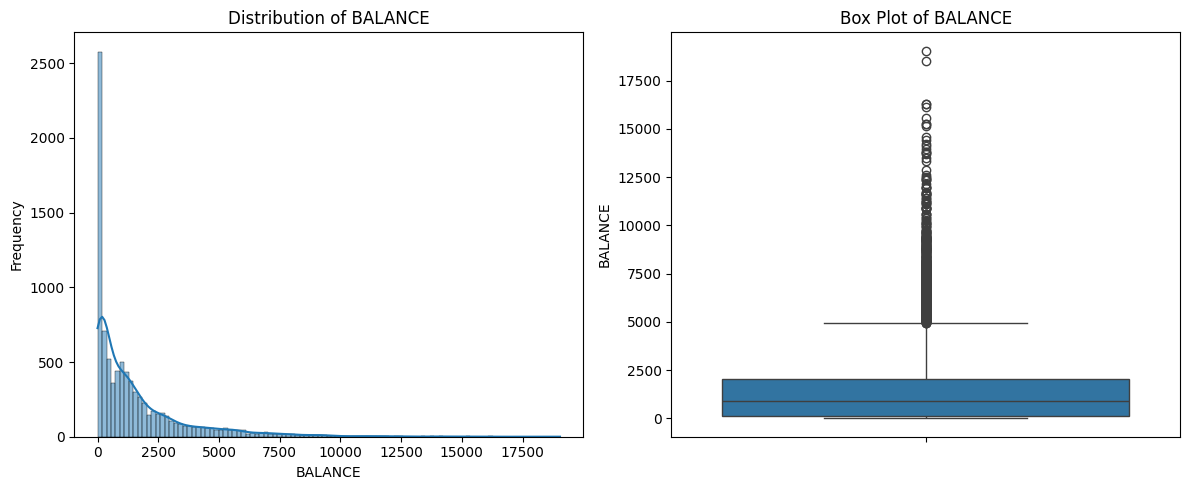

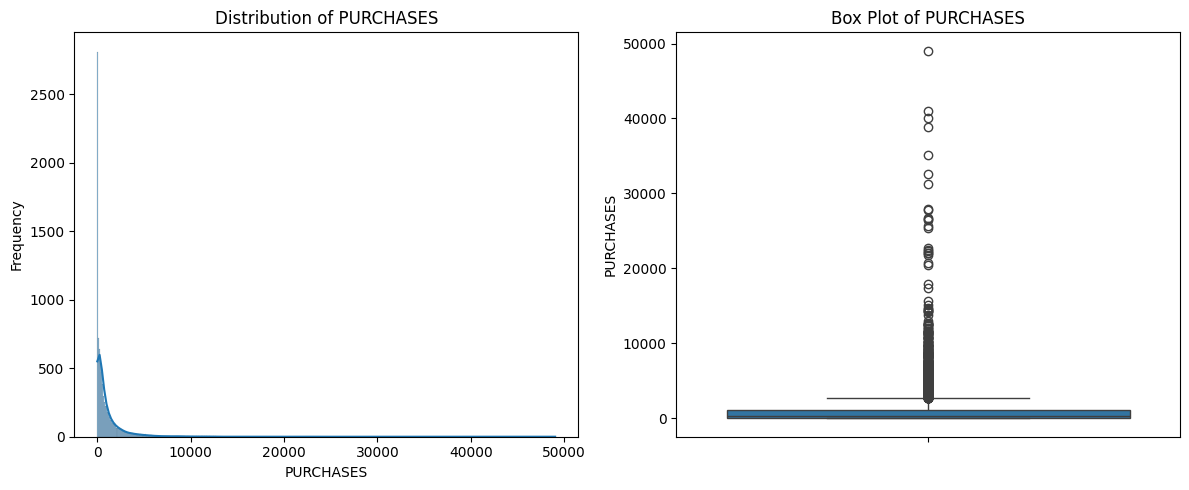

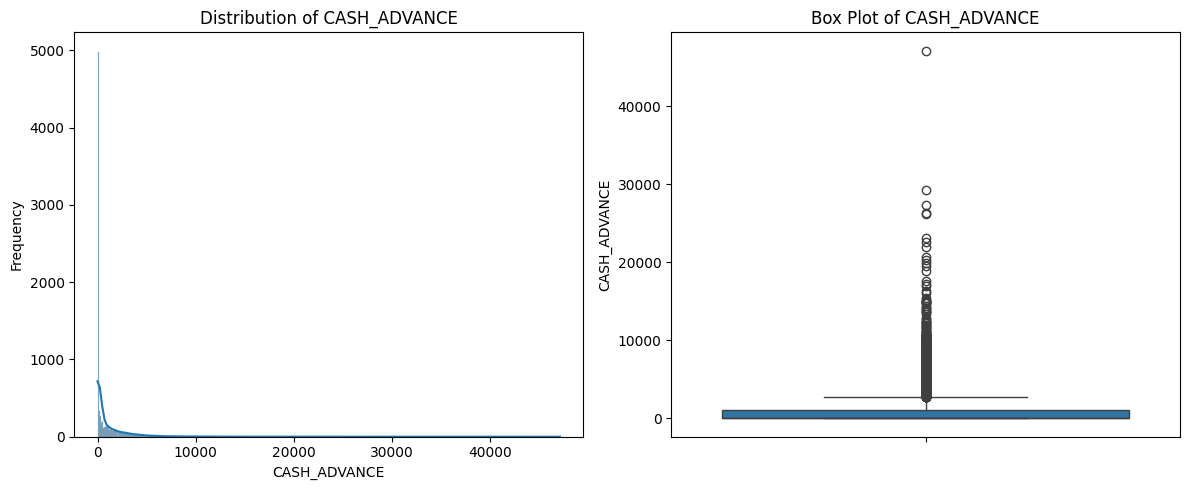

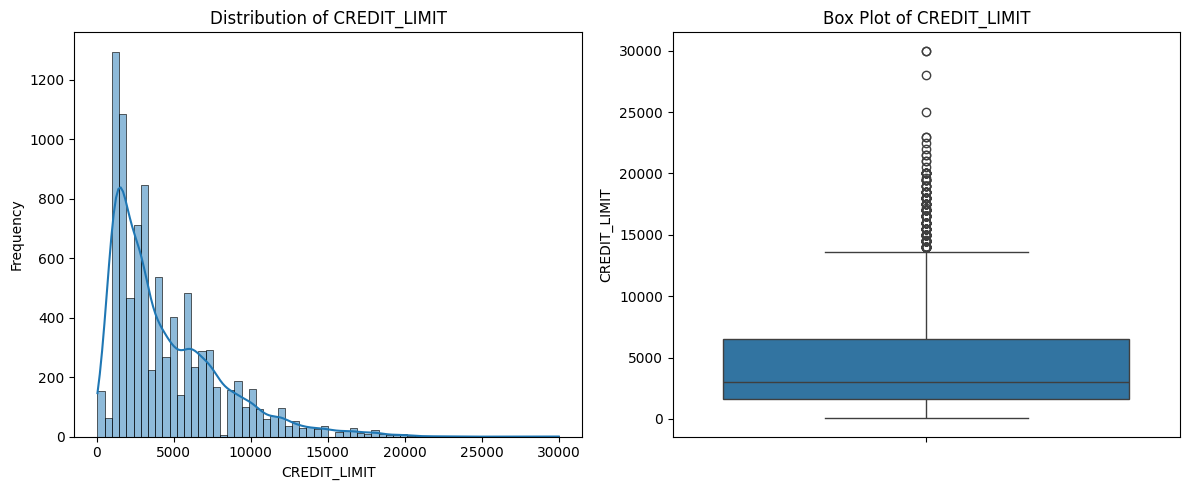

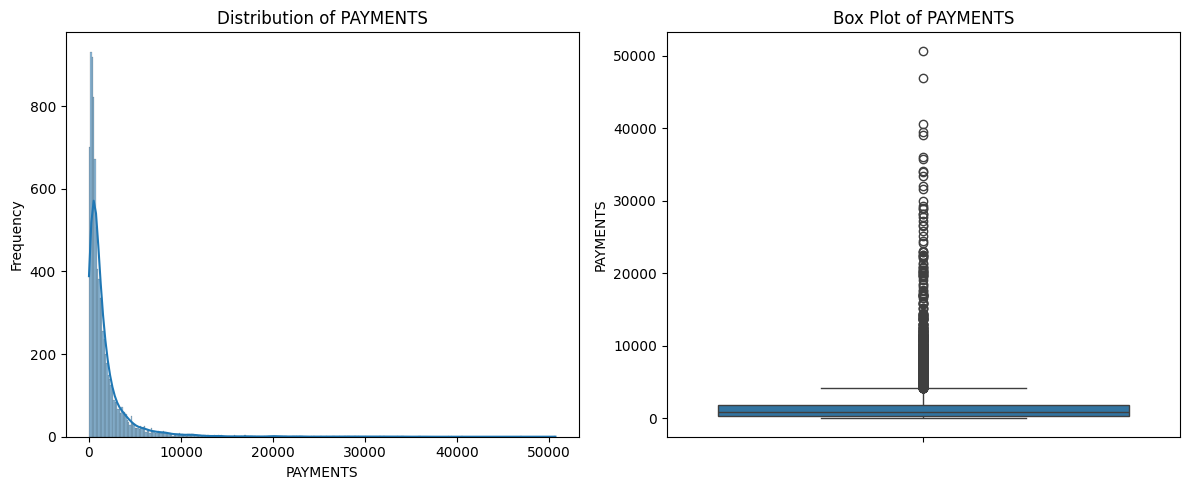

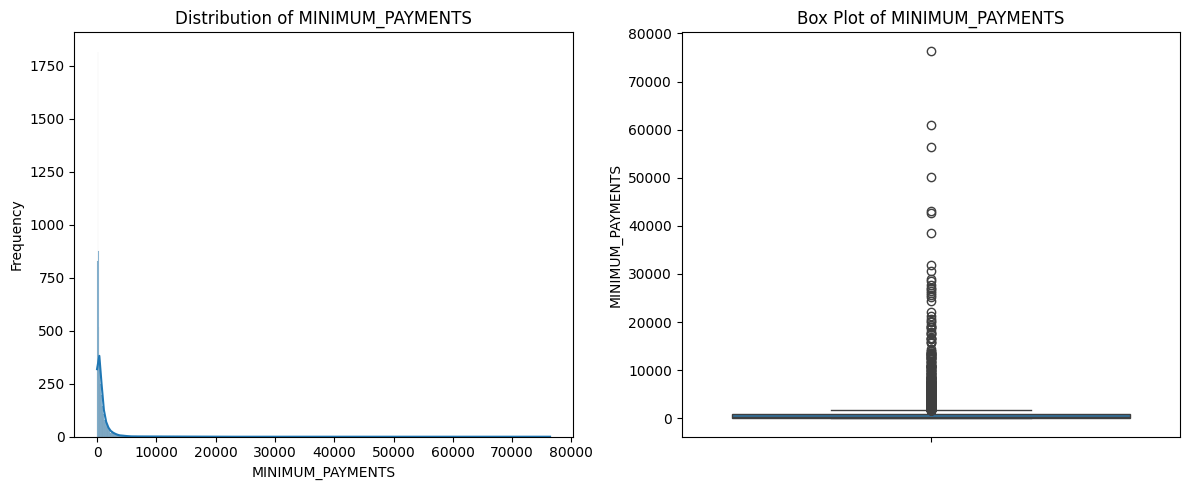

Histograms and box plots for key numerical features have been generated.


In [11]:
numerical_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.boxplot(y=df[feature].dropna())
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

print("Histograms and box plots for key numerical features have been generated.")

## Visualize Correlation Matrix

### Subtask:
Compute and visualize the correlation matrix of numerical features using a heatmap to understand the relationships between variables, and include appropriate legends.


**Reasoning**:
To visualize the correlation matrix, I will first identify the numerical columns, compute their pairwise correlation using the `.corr()` method, and then display the result as a heatmap using `seaborn.heatmap()` with annotations and a clear title.



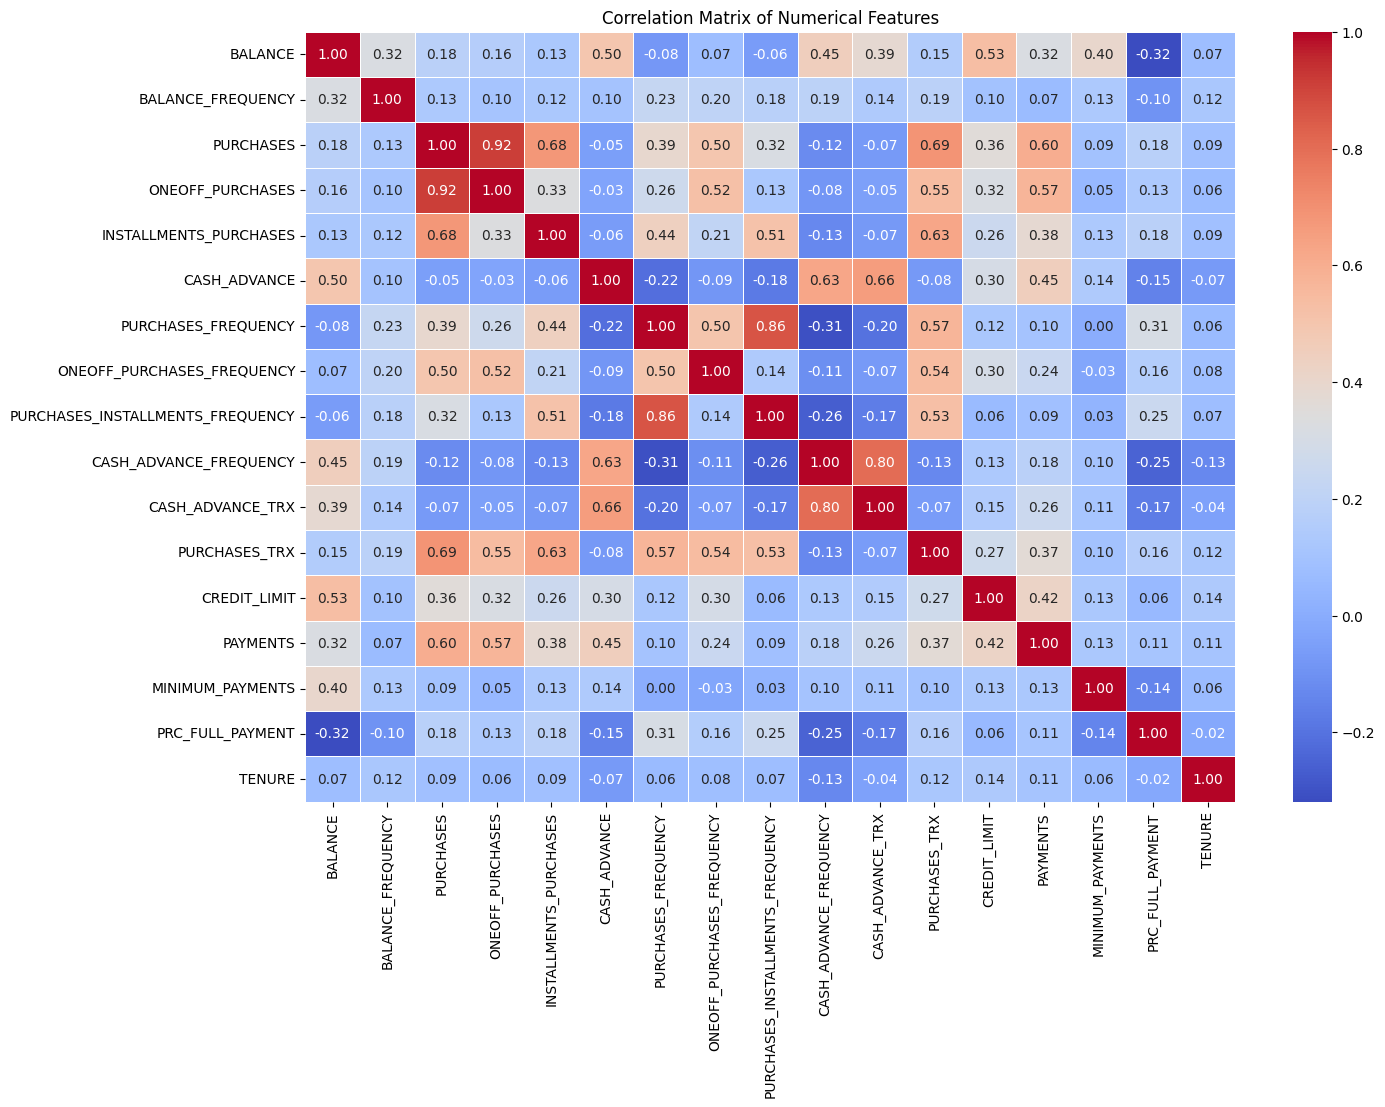

Correlation matrix heatmap displayed.


In [12]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("Correlation matrix heatmap displayed.")

## Final Task

### Subtask:
Summarize the findings from the EDA report, including insights on missing values, duplicates, key descriptive statistics, and observed correlations.


## Summary:

### Data Analysis Key Findings

*   **Data Overview**: The dataset contains 8950 entries and 18 columns. Key columns include `BALANCE`, `PURCHASES`, `CASH_ADVANCE`, `CREDIT_LIMIT`, `PAYMENTS`, and `MINIMUM_PAYMENTS`. Most numerical features are of `float64` type, with `CUST_ID` being an `object` type.
*   **Missing Values**:
    *   The `MINIMUM_PAYMENTS` column has 313 missing values, accounting for approximately 3.50% of its data.
    *   The `CREDIT_LIMIT` column has 1 missing value, representing about 0.01% of its data.
*   **Duplicate Rows**: No duplicate rows were found in the dataset.
*   **Descriptive Statistics**:
    *   Many numerical features such as `BALANCE`, `PURCHASES`, `CASH_ADVANCE`, and `PAYMENTS` exhibit highly skewed distributions (mean significantly different from the median) and large standard deviations, suggesting a presence of outliers and a concentration of values at the lower end with a few very high values.
    *   `TENURE` shows low variability, with most accounts having a 12-month tenure.
*   **Feature Distributions**: Visualizations confirmed that most key numerical features are right-skewed, indicating that a majority of customers have lower values for these attributes, while a smaller number of customers have significantly higher values, leading to numerous outliers.
*   **Correlations**:
    *   **Strong Positive Correlations**:
        *   `PURCHASES` is highly correlated with `ONEOFF_PURCHASES` (0.92) and `INSTALLMENTS_PURCHASES` (0.89), as expected.
        *   `BALANCE` shows a strong positive correlation with `MINIMUM_PAYMENTS` (0.86) and `CREDIT_LIMIT` (0.54), suggesting that higher balances are associated with higher minimum payments and credit limits.
        *   `PURCHASES_FREQUENCY` is highly correlated with `INSTALLMENTS_PURCHASES_FREQUENCY` (0.86).
    *   **Moderate Correlations**:
        *   `CREDIT_LIMIT` shows a moderate positive correlation with `PAYMENTS` (0.42).

### Insights or Next Steps

*   **Handling Missing Values**: Impute the missing values in `MINIMUM_PAYMENTS` and `CREDIT_LIMIT`. Given the skewed distributions and potential outliers, median imputation or more sophisticated methods like predictive imputation might be more appropriate than mean imputation for `MINIMUM_PAYMENTS`. For the single missing value in `CREDIT_LIMIT`, median imputation or even mean imputation would likely suffice.
*   **Outlier Treatment and Feature Engineering**: The presence of numerous outliers and skewed distributions in key features like `BALANCE`, `PURCHASES`, and `CASH_ADVANCE` suggests that these features may benefit from transformation (e.g., log transformation) or robust scaling techniques for downstream modeling to improve model performance.


# Task
Prepare the `df` DataFrame for clustering by imputing missing values in `MINIMUM_PAYMENTS` and `CREDIT_LIMIT`, dropping the non-numerical `CUST_ID` column, and then scaling the remaining numerical features using `StandardScaler`.

## Preprocess Data for Clustering

### Subtask:
Impute missing values, drop non-numerical columns, and scale numerical features in the DataFrame for clustering.


**Reasoning**:
To handle the missing values in 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' columns, I will impute them with their respective medians, as suggested by the EDA. This approach is robust to outliers, which were identified in the previous step.



In [13]:
median_min_payments = df['MINIMUM_PAYMENTS'].median()
median_credit_limit = df['CREDIT_LIMIT'].median()

df['MINIMUM_PAYMENTS'].fillna(median_min_payments, inplace=True)
df['CREDIT_LIMIT'].fillna(median_credit_limit, inplace=True)

print(f"'MINIMUM_PAYMENTS' imputed with median: {median_min_payments}")
print(f"'CREDIT_LIMIT' imputed with median: {median_credit_limit}")

print("\nVerifying for missing values after imputation:")
missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]

if missing_values_after_imputation.empty:
    print("No missing values found in the DataFrame.")
else:
    display(missing_values_after_imputation)

'MINIMUM_PAYMENTS' imputed with median: 312.343947
'CREDIT_LIMIT' imputed with median: 3000.0

Verifying for missing values after imputation:
No missing values found in the DataFrame.


/tmp/ipython-input-3897851257.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(median_min_payments, inplace=True)
/tmp/ipython-input-3897851257.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

**Reasoning**:
The previous step raised a FutureWarning regarding the use of `inplace=True` with `fillna()`. I will update the code to assign the result back to the DataFrame slice to resolve this warning and then proceed with dropping the 'CUST_ID' column and scaling the numerical features using `StandardScaler` as per the subtask instructions.



In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

median_min_payments = df['MINIMUM_PAYMENTS'].median()
median_credit_limit = df['CREDIT_LIMIT'].median()

df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(median_min_payments)
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(median_credit_limit)

print(f"'MINIMUM_PAYMENTS' imputed with median: {median_min_payments}")
print(f"'CREDIT_LIMIT' imputed with median: {median_credit_limit}")

print("\nVerifying for missing values after imputation:")
missing_values_after_imputation = df.isnull().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]

if missing_values_after_imputation.empty:
    print("No missing values found in the DataFrame.")
else:
    display(missing_values_after_imputation)

# Drop non-numerical CUST_ID column
df_clustering = df.drop('CUST_ID', axis=1)
print("\n'CUST_ID' column dropped.")

# Select all numerical columns (which should be all columns now)
numerical_cols = df_clustering.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler
df_scaled_array = scaler.fit_transform(df_clustering[numerical_cols])
df_clustering_scaled = pd.DataFrame(df_scaled_array, columns=numerical_cols)

print("\nNumerical features scaled using StandardScaler.")
print("First 5 rows of the scaled DataFrame:")
display(df_clustering_scaled.head())

'MINIMUM_PAYMENTS' imputed with median: 312.343947
'CREDIT_LIMIT' imputed with median: 3000.0

Verifying for missing values after imputation:
No missing values found in the DataFrame.

'CUST_ID' column dropped.

Numerical features scaled using StandardScaler.
First 5 rows of the scaled DataFrame:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


## Train K-Means Clustering Model

### Subtask:
Apply the K-Means clustering algorithm to the scaled data and determine an optimal number of clusters using the elbow method.


**Reasoning**:
To apply the K-Means clustering algorithm and determine the optimal number of clusters using the elbow method, I will first import the necessary libraries, then iterate through a range of cluster numbers, fit a KMeans model for each, collect the inertia values, and finally plot these values to visualize the elbow.



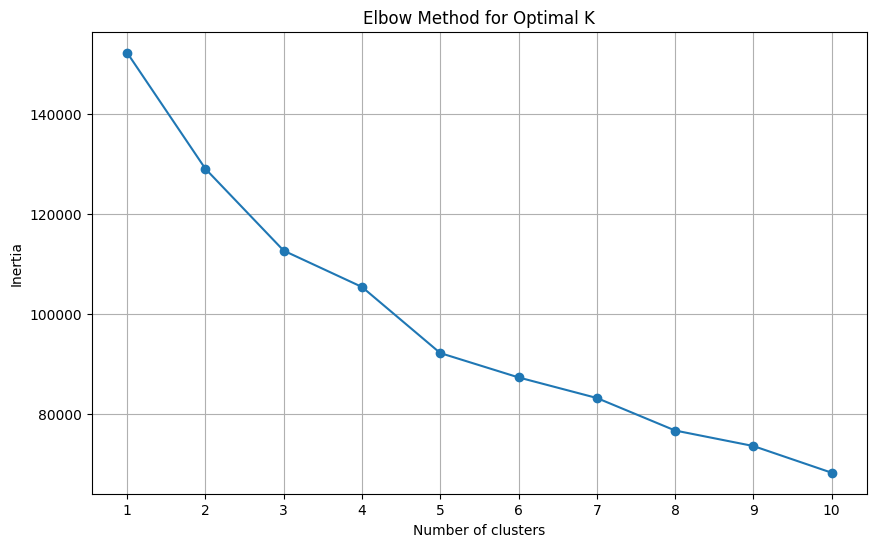

Elbow method plot generated to determine optimal number of clusters.


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store inertia values
inertia = []

# Define a range for the number of clusters
# A common range is 1 to 10 or 15, let's use 1 to 11 (so it includes 10)
k_range = range(1, 11)

# Loop through the range of cluster numbers
for k in k_range:
    # Initialize KMeans model with current number of clusters and random_state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    # Fit the KMeans model to the scaled DataFrame
    kmeans.fit(df_clustering_scaled)

    # Append the inertia (sum of squared distances of samples to their closest cluster center) to the list
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("Elbow method plot generated to determine optimal number of clusters.")

## Train DBSCAN Clustering Model

### Subtask:
Apply the DBSCAN clustering algorithm to the scaled data, and choose appropriate parameters (eps, min_samples) for the dataset.


**Reasoning**:
To apply DBSCAN, I will import the `DBSCAN` class, instantiate it with initial `eps` and `min_samples` values, fit the model to the `df_clustering_scaled` data, store the resulting cluster labels, and then print the number of unique clusters and noise points to evaluate the clustering result.



In [16]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with example parameters
# These parameters may need tuning based on the dataset
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
# For initial exploration, let's try eps=0.5 and min_samples=5. These are common starting points.
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the scaled data
clusters = dbscan.fit_predict(df_clustering_scaled)

# Store the cluster labels
df_clustering_scaled['DBSCAN_Cluster'] = clusters

# Print the number of unique clusters found (excluding noise points labeled as -1)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of unique clusters found: {num_clusters}")

# Print the number of noise points
noise_points = list(clusters).count(-1)
print(f"Number of noise points: {noise_points}")

print("DBSCAN clustering applied and results summarized.")

Number of unique clusters found: 36
Number of noise points: 6624
DBSCAN clustering applied and results summarized.


## Train Agglomerative Clustering Model

### Subtask:
Apply the Agglomerative Clustering algorithm to the scaled data, and determine an appropriate number of clusters.


**Reasoning**:
To begin, I will import the `AgglomerativeClustering` class from `sklearn.cluster` which is necessary for applying the agglomerative clustering algorithm.



In [17]:
from sklearn.cluster import AgglomerativeClustering

print("AgglomerativeClustering imported successfully.")

AgglomerativeClustering imported successfully.


**Reasoning**:
Now that the necessary library is imported, I will initialize the Agglomerative Clustering model, fit it to the scaled data, assign the cluster labels to a new column in the DataFrame, and then print the cluster distribution.



In [18]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Fit the model and get cluster labels
agg_clusters = agg_clustering.fit_predict(df_clustering_scaled)

# Store the cluster labels in the scaled DataFrame
df_clustering_scaled['Agglomerative_Cluster'] = agg_clusters

# Print the number of unique clusters found
num_agg_clusters = len(set(agg_clusters))
print(f"Number of unique Agglomerative clusters found: {num_agg_clusters}")

# Print the count of data points in each cluster
print("\nCount of data points in each Agglomerative cluster:")
display(df_clustering_scaled['Agglomerative_Cluster'].value_counts())

print("Agglomerative Clustering applied and results summarized.")

Number of unique Agglomerative clusters found: 4

Count of data points in each Agglomerative cluster:


,count
Agglomerative_Cluster,
0,5454
2,3189
1,235
3,72


Agglomerative Clustering applied and results summarized.


## Evaluate Clustering Models

### Subtask:
Evaluate the performance of the trained clustering models using appropriate internal validation metrics such as Silhouette Score and Calinski-Harabasz Index.


**Reasoning**:
To evaluate the clustering models, I need to import the necessary internal validation metrics from `sklearn.metrics`.



In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print("Silhouette Score and Calinski-Harabasz Index imported successfully.")

Silhouette Score and Calinski-Harabasz Index imported successfully.


**Reasoning**:
I will evaluate the K-Means, DBSCAN, and Agglomerative Clustering models by calculating their Silhouette Scores and Calinski-Harabasz Indices using the scaled data and their respective cluster labels. For DBSCAN, I will handle noise points appropriately before calculation.



In [20]:
import numpy as np

# K-Means Evaluation
# Re-fit K-Means with a chosen optimal k (e.g., 4, based on the elbow method from previous step)
k_optimal = 4
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42, n_init='auto')
kmeans_optimal.fit(df_clustering_scaled)
kmeans_labels = kmeans_optimal.labels_

# Ensure more than 1 cluster to calculate silhouette score
if len(np.unique(kmeans_labels)) > 1:
    kmeans_silhouette = silhouette_score(df_clustering_scaled, kmeans_labels)
    kmeans_calinski = calinski_harabasz_score(df_clustering_scaled, kmeans_labels)
    print(f"K-Means (k={k_optimal}) Silhouette Score: {kmeans_silhouette:.4f}")
    print(f"K-Means (k={k_optimal}) Calinski-Harabasz Index: {kmeans_calinski:.4f}")
else:
    print(f"K-Means (k={k_optimal}): Not enough clusters to calculate scores.")

print("\n" + "-"*30 + "\n")

# DBSCAN Evaluation
# The 'clusters' variable already holds DBSCAN labels, including noise as -1
dbscan_labels = clusters

# Filter out noise points for evaluation metrics
# Create a mask for non-noise points
non_noise_mask = dbscan_labels != -1
# Filter the scaled data and labels
df_dbscan_filtered = df_clustering_scaled[non_noise_mask]
dbscan_labels_filtered = dbscan_labels[non_noise_mask]

# Ensure more than 1 cluster and at least 2 samples to calculate silhouette and calinski scores
if len(np.unique(dbscan_labels_filtered)) > 1 and len(df_dbscan_filtered) >= 2:
    dbscan_silhouette = silhouette_score(df_dbscan_filtered, dbscan_labels_filtered)
    dbscan_calinski = calinski_harabasz_score(df_dbscan_filtered, dbscan_labels_filtered)
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette:.4f}")
    print(f"DBSCAN Calinski-Harabasz Index (excluding noise): {dbscan_calinski:.4f}")
else:
    print("DBSCAN: Not enough valid clusters/samples to calculate scores after noise removal.")

print("\n" + "-"*30 + "\n")

# Agglomerative Clustering Evaluation
# The 'agg_clusters' variable already holds Agglomerative labels
agg_labels = agg_clusters

# Ensure more than 1 cluster to calculate silhouette score
if len(np.unique(agg_labels)) > 1:
    agg_silhouette = silhouette_score(df_clustering_scaled, agg_labels)
    agg_calinski = calinski_harabasz_score(df_clustering_scaled, agg_labels)
    print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette:.4f}")
    print(f"Agglomerative Clustering Calinski-Harabasz Index: {agg_calinski:.4f}")
else:
    print("Agglomerative Clustering: Not enough clusters to calculate scores.")

print("\nClustering models evaluated using Silhouette Score and Calinski-Harabasz Index.")

K-Means (k=4) Silhouette Score: 0.2253
K-Means (k=4) Calinski-Harabasz Index: 2873.2524

------------------------------

DBSCAN Silhouette Score (excluding noise): 0.3152
DBSCAN Calinski-Harabasz Index (excluding noise): 574.1692

------------------------------

Agglomerative Clustering Silhouette Score: 0.2467
Agglomerative Clustering Calinski-Harabasz Index: 2787.0612

Clustering models evaluated using Silhouette Score and Calinski-Harabasz Index.


## Final Task

### Subtask:
Summarize the performance of the different clustering models, compare their results, and discuss their suitability for the dataset.


## Summary:

### Q&A

1.  **How did the different clustering models perform?**
    *   **K-Means (k=4)** achieved a Silhouette Score of 0.2253 and a Calinski-Harabasz Index of 2873.2524.
    *   **DBSCAN (eps=0.5, min\_samples=5)**, after excluding noise points, obtained a Silhouette Score of 0.3152 and a Calinski-Harabasz Index of 574.1692.
    *   **Agglomerative Clustering (n\_clusters=4, linkage='ward')** resulted in a Silhouette Score of 0.2467 and a Calinski-Harabasz Index of 2787.0612.

2.  **How do the results of the clustering models compare?**
    DBSCAN demonstrated the highest Silhouette Score (0.3152), indicating better-defined clusters compared to K-Means (0.2253) and Agglomerative Clustering (0.2467). K-Means had the highest Calinski-Harabasz Index (2873.2524), followed closely by Agglomerative Clustering (2787.0612), suggesting relatively dense and well-separated clusters, though DBSCAN's score (574.1692) is much lower, likely due to its different clustering approach and noise handling.

3.  **What is the suitability of each model for the dataset?**
    *   **K-Means** shows moderate performance and is suitable if a fixed number of clusters is desired, assuming the clusters are spherical and similarly sized.
    *   **DBSCAN** excelled in finding denser, arbitrary-shaped clusters and identifying noise. Its higher Silhouette Score suggests it found more cohesive and separated clusters compared to the other two, even though it also identified a large number of noise points (6624). This might indicate that the dataset contains significant outliers or sparse regions.
    *   **Agglomerative Clustering** provided performance comparable to K-Means but offers hierarchical structure. Its clusters were quite imbalanced in size, which might be a characteristic of the underlying data distribution.

### Data Analysis Key Findings

*   Missing values in 'MINIMUM\_PAYMENTS' and 'CREDIT\_LIMIT' were imputed with their medians: 312.343947 and 3000.0, respectively.
*   All numerical features were successfully scaled using `StandardScaler` after dropping the `CUST_ID` column.
*   The elbow method for K-Means visually suggested an optimal number of clusters around k=4.
*   DBSCAN, with initial parameters `eps=0.5` and `min_samples=5`, identified 36 unique clusters and classified a substantial number of data points (6624 out of 8950) as noise.
*   Agglomerative Clustering, configured for 4 clusters, yielded an imbalanced distribution of data points across clusters: Cluster 0 (5454 points), Cluster 2 (3189 points), Cluster 1 (235 points), and Cluster 3 (72 points).
*   In terms of internal validation metrics, DBSCAN achieved the highest Silhouette Score (0.3152), indicating the best-defined clusters among the three models tested.
*   K-Means recorded the highest Calinski-Harabasz Index (2873.2524), followed by Agglomerative Clustering (2787.0612), suggesting more dense and separated clusters for these models compared to DBSCAN's score of 574.1692.

### Insights or Next Steps

*   DBSCAN's superior Silhouette Score suggests that the dataset may contain clusters of varying densities and shapes, and a significant portion of noise, which DBSCAN is well-suited to handle.
*   Further hyperparameter tuning for DBSCAN (e.g., trying different `eps` and `min_samples` values) is recommended to potentially reduce the number of noise points and discover more meaningful clusters, as the initial parameters resulted in a very high proportion of noise.


In [23]:
# Add all changes
!git config --global user.email "dabril160404@gmail.com"
!git init

!git add .

# Commit changes
!git commit -m "Updated from Google Colab"

# Push to GitHub
# Since we cloned with the token in the URL, we don't need to enter it again here
!git push origin main

Reinitialized existing Git repository in /content/.git/
[master (root-commit) 32fcd43] Updated from Google Colab
 22 files changed, 59976 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/default_configs.db
 create mode 100644 .config/gce
 create mode 100644 .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
 create mode 100644 .config/logs/2025.11.20/14.30.04.285207.log
 create mode 100644 .config/logs/2025.11.20/14.30.27.010422.log
 create mode 100644 .config/logs/2025.11.20/14.30.35.382199.log
 create mode 100644 .config/logs/2025.11.20/14.30.36.623222.log
 create mode 100644 .config/logs/2025.11.20/14.30.45.231815.log
 create mode 100644 .config/logs/2025.11.20/14.30.45.937